In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import datetime
import numpy as np
from functools import reduce
import bt
import talib

! conda activate py310
! conda info --env
! python --version

# conda environments:
#
base                     C:\Users\Alienware\miniconda3
Py310                    C:\Users\Alienware\miniconda3\envs\Py310
py310                 *  C:\Users\Alienware\miniconda3\envs\py310

Python 3.10.11


In [2]:
# Load the data
bitcoin_data = pd.read_csv('Bitcoin.csv', index_col='Date', parse_dates=True)

# Print the top 5 rows
print(bitcoin_data.head())

              Open    High     Low   Close     Volume
Date                                                 
2016-12-17  785.17  792.51  784.86  790.83   78989800
2016-12-18  791.01  794.74  788.03  790.53   60524400
2016-12-19  790.69  793.61  790.32  792.71   74886400
2016-12-20  792.25  801.34  791.50  800.88   99629296
2016-12-21  800.64  834.28  799.41  834.28  155576000


In [3]:
# Plot the daily high price
plt.plot(bitcoin_data['High'], color='green')
# Plot the daily low price
plt.plot(bitcoin_data['Low'], color='red')

plt.title('Daily high low prices')
plt.show()

C:\Users\Alienware\AppData\Local\Temp\ipykernel_25024\1285595789.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


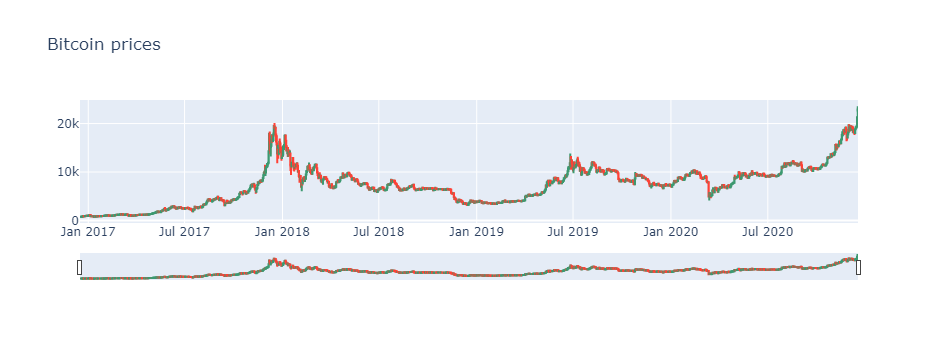

In [4]:
# Define the candlestick data
candlestick = go.Candlestick(
    x=bitcoin_data.index,
    open=bitcoin_data['Open'],
    high=bitcoin_data['High'],
    low=bitcoin_data['Low'],
    close=bitcoin_data['Close'])

# Create a candlestick figure   
fig = go.Figure(data=[candlestick])
fig.update_layout(title='Bitcoin prices')                        

# Show the plot
fig.show()

In [5]:
# Load the data
eurusd_15m = pd.read_csv('EURUSD_15m.csv', index_col='Time', parse_dates=True)
eurusd_15m.head()

Open     High      Low    Close       Volume
Time                                                                
2010-01-01 00:00:00  1.43283  1.43293  1.43224  1.43293  608600007.1
2010-01-01 00:15:00  1.43285  1.43295  1.43229  1.43275  535600003.2
2010-01-01 00:30:00  1.43280  1.43303  1.43239  1.43281  436299999.2
2010-01-01 00:45:00  1.43285  1.43294  1.43229  1.43276  614299997.3
2010-01-01 01:00:00  1.43287  1.43292  1.43206  1.43282  705300008.8

In [6]:
# Resample the data to daily by calculating the mean values
eurusd_daily = eurusd_15m.resample('D').mean()

# Print the top 5 rows
print(eurusd_daily.head())

                Open      High       Low     Close        Volume
Time                                                            
2010-01-01  1.433060  1.433316  1.432669  1.433058  7.998688e+08
2010-01-02  1.433350  1.433350  1.433350  1.433350  0.000000e+00
2010-01-03  1.433221  1.433288  1.433168  1.433237  3.126667e+07
2010-01-04  1.436392  1.437289  1.435604  1.436509  8.335354e+08
2010-01-05  1.440934  1.441628  1.440109  1.440874  8.321573e+08


In [7]:
# Resample the data to weekly by calculating the mean values
eurusd_weekly = eurusd_15m.resample('W').mean()

# Print the top 5 rows
print(eurusd_weekly.head())

                Open      High       Low     Close        Volume
Time                                                            
2010-01-03  1.433210  1.433318  1.433062  1.433215  2.770451e+08
2010-01-10  1.437953  1.438503  1.437363  1.437977  5.976888e+08
2010-01-17  1.445525  1.446035  1.444962  1.445519  5.958656e+08
2010-01-24  1.419468  1.419951  1.418857  1.419427  5.926124e+08
2010-01-31  1.399101  1.399580  1.398516  1.399062  5.901987e+08


In [8]:
# Load the data
tsla_data = pd.read_csv('TSLA.csv', index_col='Date', parse_dates=True)
tsla_data.head()

Open   High    Low  Close  Adj Close    Volume
Date                                                       
2015-12-18  46.58  47.18  45.86  46.09      46.09  15071000
2015-12-21  46.34  47.17  46.22  46.51      46.51   9766000
2015-12-22  47.00  47.31  45.93  45.99      45.99   9807500
2015-12-23  46.44  46.69  45.63  45.94      45.94   7775000
2015-12-24  46.11  46.38  45.66  46.11      46.11   3540000

In [9]:
# Calculate daily returns
tsla_data['daily_return'] = tsla_data['Close'].pct_change() * 100

# Plot the histogram
tsla_data['daily_return'].hist(bins=100, color='red')
plt.ylabel('Frequency')
plt.xlabel('Daily return')
plt.title('Daily return histogram')
plt.show()

C:\Users\Alienware\AppData\Local\Temp\ipykernel_25024\185425250.py:9: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



In [10]:
# Load the data
aapl_data = pd.read_csv('AAPL.csv', index_col='Date', parse_dates=True)
aapl_data.head()


Open      High       Low     Close  Adj Close       Volume
Date                                                                      
1980-12-12  0.513393  0.515625  0.513393  0.513393   0.407747  117258400.0
1980-12-15  0.488839  0.488839  0.486607  0.486607   0.386473   43971200.0
1980-12-16  0.453125  0.453125  0.450893  0.450893   0.358108   26432000.0
1980-12-17  0.462054  0.464286  0.462054  0.462054   0.366972   21610400.0
1980-12-18  0.475446  0.477679  0.475446  0.475446   0.377609   18362400.0

In [11]:
# Calculate SMA
aapl_data['sma_50'] = aapl_data['Close'].rolling(window=50).mean()

#date range
# start_date = datetime.date(2018, 1, 1)
start_date = np.datetime64('2018-01-01T01:00:00.000000+0100')
# end_date = datetime.date(2020, 12, 31)
end_date = np.datetime64('2021-01-01T01:00:00.000000+0100')
mask = (aapl_data.index > start_date) & (aapl_data.index <= end_date)

aapl_data_daterange = aapl_data.loc[mask]

# Plot the SMA
plt.plot(aapl_data_daterange['sma_50'], color='green', label='SMA_50')
# Plot the close price
plt.plot(aapl_data_daterange['Close'], color='red', label='Close')

# Customize and show the plot
plt.title('Simple moving averages')
plt.legend()
plt.show()

C:\Users\Alienware\AppData\Local\Temp\ipykernel_25024\2904417205.py:6: DeprecationWarning:

parsing timezone aware datetimes is deprecated; this will raise an error in the future

C:\Users\Alienware\AppData\Local\Temp\ipykernel_25024\2904417205.py:8: DeprecationWarning:

parsing timezone aware datetimes is deprecated; this will raise an error in the future

C:\Users\Alienware\AppData\Local\Temp\ipykernel_25024\2904417205.py:21: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



In [12]:
# Load the data
AAPL = pd.read_csv('faang\AAPL.csv', index_col='timestamp', parse_dates=True)
AMZN = pd.read_csv('faang\AMZN.csv', index_col='timestamp', parse_dates=True)
FB = pd.read_csv('faang\FB.csv', index_col='timestamp', parse_dates=True)
GOOG = pd.read_csv('faang\GOOG.csv', index_col='timestamp', parse_dates=True)
NFLX = pd.read_csv(r'faang\NFLX.csv', index_col='timestamp', parse_dates=True)

AAPL_ac = AAPL[['adjusted_close']]
AAPL_ac.rename(columns={"adjusted_close": "ac_AAPL"}, inplace = True)
AMZN_ac = AMZN[['adjusted_close']]
AMZN_ac.rename(columns={"adjusted_close": "ac_AMZN"}, inplace = True)
FB_ac = FB[['adjusted_close']]
FB_ac.rename(columns={"adjusted_close": "ac_FB"}, inplace = True)
GOOG_ac = GOOG[['adjusted_close']]
GOOG_ac.rename(columns={"adjusted_close": "ac_GOOG"}, inplace = True)
NFLX_ac = NFLX[['adjusted_close']]
NFLX_ac.rename(columns={"adjusted_close": "ac_NFLX"}, inplace = True)
NFLX_ac.head()

C:\Users\Alienware\AppData\Local\Temp\ipykernel_25024\1271519350.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Alienware\AppData\Local\Temp\ipykernel_25024\1271519350.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Alienware\AppData\Local\Temp\ipykernel_25024\1271519350.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Alienware\AppData\Local\Temp\ipykernel_25024\1271519350.py:15: SettingWithCop

ac_NFLX
timestamp          
2020-10-01   527.51
2020-09-30   500.03
2020-09-29   493.48
2020-09-28   490.65
2020-09-25   482.88

In [13]:
faang_ds = [AAPL_ac, AMZN_ac, FB_ac, GOOG_ac, NFLX_ac]

faang = pd.concat(faang_ds, join='outer', axis=1)
# faang = reduce(lambda  left, right: pd.merge(left, right, how='outer', right_index=True, left_index=True), faang_ds)
faang.head()

ac_AAPL  ac_AMZN  ac_FB  ac_GOOG  ac_NFLX
timestamp                                            
2000-01-03   0.8636    89.38    NaN      NaN      NaN
2000-01-04   0.7907    81.94    NaN      NaN      NaN
2000-01-05   0.8023    71.75    NaN      NaN      NaN
2000-01-06   0.7329    65.56    NaN      NaN      NaN
2000-01-07   0.7676    69.56    NaN      NaN      NaN

In [14]:
#date range
# start_date = datetime.date(2018, 1, 1)
start_date = np.datetime64('2020-01-01T01:00:00.000000+0100')
# end_date = datetime.date(2020, 12, 31)
end_date = np.datetime64('2021-01-01T01:00:00.000000+0100')
mask = (faang.index > start_date) & (faang.index <= end_date)

faang_daterange = faang.loc[mask]
faang_daterange.head()

C:\Users\Alienware\AppData\Local\Temp\ipykernel_25024\3627471930.py:3: DeprecationWarning:

parsing timezone aware datetimes is deprecated; this will raise an error in the future

C:\Users\Alienware\AppData\Local\Temp\ipykernel_25024\3627471930.py:5: DeprecationWarning:

parsing timezone aware datetimes is deprecated; this will raise an error in the future



ac_AAPL  ac_AMZN   ac_FB  ac_GOOG  ac_NFLX
timestamp                                             
2020-01-02  74.5722  1898.01  209.78  1367.37   329.81
2020-01-03  73.8472  1874.97  208.67  1360.66   325.90
2020-01-06  74.4356  1902.88  212.60  1394.21   335.83
2020-01-07  74.0855  1906.86  213.06  1393.34   330.75
2020-01-08  75.2773  1891.97  215.22  1404.32   339.26

In [15]:
# Define the strategy
bt_strategy = bt.Strategy('Trade_Weekly', 
                         [bt.algos.RunWeekly(),
                          bt.algos.SelectAll(),
                          bt.algos.WeighEqually(),
                          bt.algos.Rebalance()])

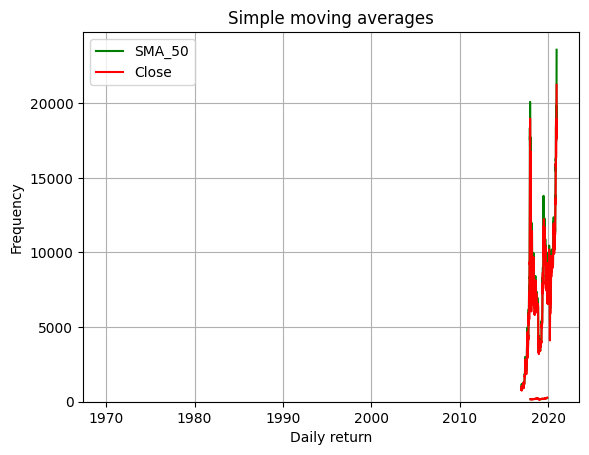

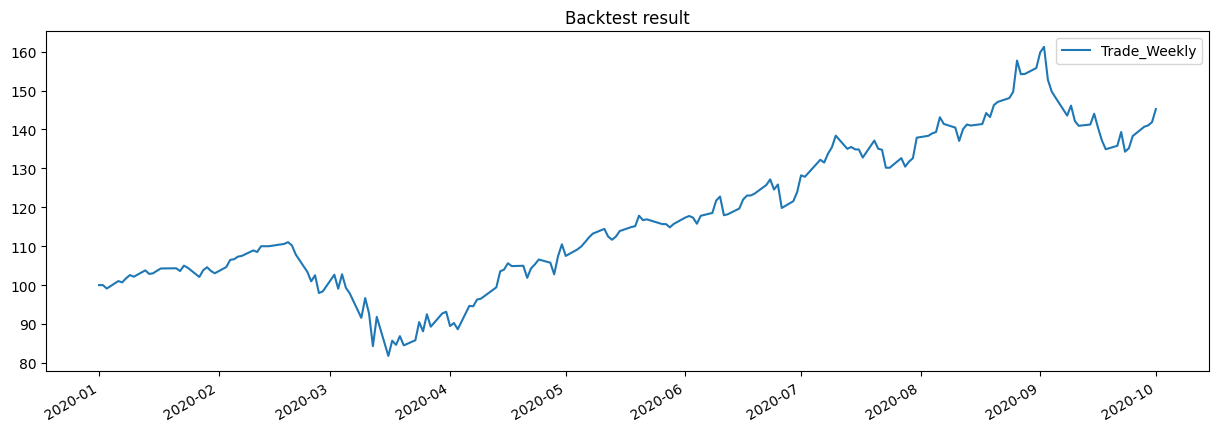

In [16]:
# Create a backtest
bt_test = bt.Backtest(bt_strategy, faang_daterange)
# Run the backtest
bt_res = bt.run(bt_test)

%matplotlib inline
# Plot the test result
bt_res.plot(title="Backtest result")
plt.show()

In [17]:
#date range
start_date = np.datetime64('2018-01-01T01:00:00.000000+0100')
end_date = np.datetime64('2023-01-01T01:00:00.000000+0100')
mask = (GOOG.index > start_date) & (GOOG.index <= end_date)

GOOG_daterange = GOOG.loc[mask].sort_values(by = 'timestamp')
GOOG_daterange.head()

C:\Users\Alienware\AppData\Local\Temp\ipykernel_25024\1922774278.py:2: DeprecationWarning:

parsing timezone aware datetimes is deprecated; this will raise an error in the future

C:\Users\Alienware\AppData\Local\Temp\ipykernel_25024\1922774278.py:3: DeprecationWarning:

parsing timezone aware datetimes is deprecated; this will raise an error in the future



open     high      low    close  adjusted_close   volume   
timestamp                                                                 
2018-01-02  1048.34  1066.94  1045.23  1065.00         1065.00  1223114  \
2018-01-03  1064.31  1086.29  1063.21  1082.48         1082.48  1416093   
2018-01-04  1088.00  1093.57  1084.00  1086.40         1086.40   990510   
2018-01-05  1094.00  1104.25  1092.00  1102.23         1102.23  1210974   
2018-01-08  1102.23  1111.27  1101.62  1106.94         1106.94  1003098   

            dividend_amount  split_coefficient  
timestamp                                       
2018-01-02              0.0                1.0  
2018-01-03              0.0                1.0  
2018-01-04              0.0                1.0  
2018-01-05              0.0                1.0  
2018-01-08              0.0                1.0

In [18]:
# Calculate 12-day EMA
GOOG_daterange['EMA_12'] = talib.EMA(GOOG_daterange['close'], timeperiod = 12)
# Calculate 26-day EMA
GOOG_daterange['EMA_26'] = talib.EMA(GOOG_daterange['close'], timeperiod = 26)
GOOG_daterange.tail()

open       high        low    close  adjusted_close   volume   
timestamp                                                                     
2020-09-25  1432.63  1450.0000  1413.3400  1444.96         1444.96  1323375  \
2020-09-28  1474.21  1476.8000  1449.3012  1464.52         1464.52  2007941   
2020-09-29  1470.39  1476.6632  1458.8050  1469.33         1469.33   979102   
2020-09-30  1466.80  1489.7500  1459.8800  1469.60         1469.60  1701608   
2020-10-01  1484.27  1499.0400  1479.2100  1490.09         1490.09  1779497   

            dividend_amount  split_coefficient       EMA_12       EMA_26  
timestamp                                                                 
2020-09-25              0.0                1.0  1479.497981  1513.509453  
2020-09-28              0.0                1.0  1477.193676  1509.880605  
2020-09-29              0.0                1.0  1475.983880  1506.876856  
2020-09-30              0.0                1.0  1475.001745  1504.115608  
2020-10-01              0.0                1.0  1477.323015  1503.076674

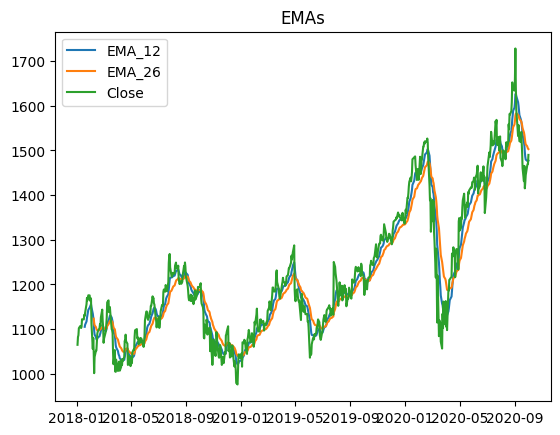

In [19]:
# Plot the EMAs with price
plt.plot(GOOG_daterange['EMA_12'], label='EMA_12')
plt.plot(GOOG_daterange['EMA_26'], label='EMA_26')
plt.plot(GOOG_daterange['close'], label='Close')

# Customize and show the plot
plt.legend()
plt.title('EMAs')
plt.show()


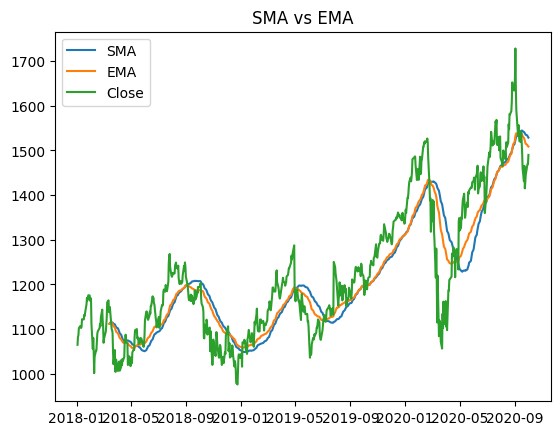

In [20]:
# Calculate the SMA
GOOG_daterange['SMA'] = talib.SMA(GOOG_daterange['close'], timeperiod = 50)
# Calculate the EMA
GOOG_daterange['EMA'] = talib.EMA(GOOG_daterange['close'], timeperiod = 50)

# Plot the SMA, EMA with price
plt.plot(GOOG_daterange['SMA'], label='SMA')
plt.plot(GOOG_daterange['EMA'], label='EMA')
plt.plot(GOOG_daterange['close'], label='Close')

# Customize and show the plot
plt.legend()
plt.title('SMA vs EMA')
plt.show()

In [21]:
# Calculate the ADX with the default time period
GOOG_daterange['ADX_14'] = talib.ADX(GOOG_daterange['high'],
                            GOOG_daterange['low'], 
                            GOOG_daterange['close'])

# Calculate the ADX with the time period set to 21
GOOG_daterange['ADX_21'] = talib.ADX(GOOG_daterange['high'],
                            GOOG_daterange['low'], 
                            GOOG_daterange['close'],
                                timeperiod=21)

# Print the last five rows
print(GOOG_daterange.tail())

               open       high        low    close  adjusted_close   volume   
timestamp                                                                     
2020-09-25  1432.63  1450.0000  1413.3400  1444.96         1444.96  1323375  \
2020-09-28  1474.21  1476.8000  1449.3012  1464.52         1464.52  2007941   
2020-09-29  1470.39  1476.6632  1458.8050  1469.33         1469.33   979102   
2020-09-30  1466.80  1489.7500  1459.8800  1469.60         1469.60  1701608   
2020-10-01  1484.27  1499.0400  1479.2100  1490.09         1490.09  1779497   

            dividend_amount  split_coefficient       EMA_12       EMA_26   
timestamp                                                                  
2020-09-25              0.0                1.0  1479.497981  1513.509453  \
2020-09-28              0.0                1.0  1477.193676  1509.880605   
2020-09-29              0.0                1.0  1475.983880  1506.876856   
2020-09-30              0.0                1.0  1475.001745  1504.

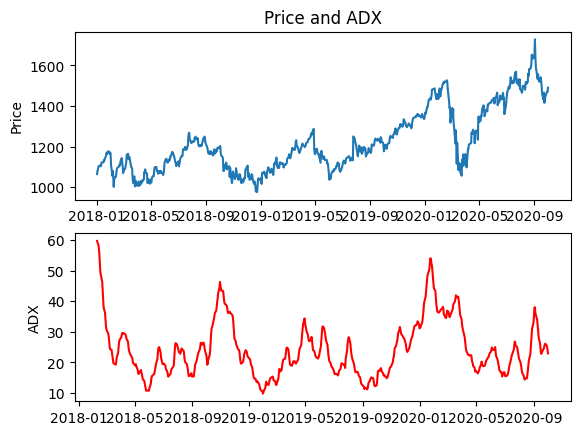

In [22]:
# Calculate ADX
GOOG_daterange['ADX'] = talib.ADX(GOOG_daterange['high'], GOOG_daterange['low'], GOOG_daterange['close'])

# Create subplots
fig, (ax1, ax2) = plt.subplots(2)

# Plot ADX with the price
ax1.set_ylabel('Price')
ax1.plot(GOOG_daterange['close'])
ax2.set_ylabel('ADX')
ax2.plot(GOOG_daterange['ADX'], color='red')

ax1.set_title('Price and ADX')
plt.show()

In [23]:
# Calculate RSI with the default time period
GOOG_daterange['RSI_14'] = talib.RSI(GOOG_daterange['close'])

# Calculate RSI with a time period of 21
GOOG_daterange['RSI_21'] = talib.RSI(GOOG_daterange['close'], timeperiod = 21)

# Print the last five rows
print(GOOG_daterange.tail())

               open       high        low    close  adjusted_close   volume   
timestamp                                                                     
2020-09-25  1432.63  1450.0000  1413.3400  1444.96         1444.96  1323375  \
2020-09-28  1474.21  1476.8000  1449.3012  1464.52         1464.52  2007941   
2020-09-29  1470.39  1476.6632  1458.8050  1469.33         1469.33   979102   
2020-09-30  1466.80  1489.7500  1459.8800  1469.60         1469.60  1701608   
2020-10-01  1484.27  1499.0400  1479.2100  1490.09         1490.09  1779497   

            dividend_amount  split_coefficient       EMA_12       EMA_26   
timestamp                                                                  
2020-09-25              0.0                1.0  1479.497981  1513.509453  \
2020-09-28              0.0                1.0  1477.193676  1509.880605   
2020-09-29              0.0                1.0  1475.983880  1506.876856   
2020-09-30              0.0                1.0  1475.001745  1504.

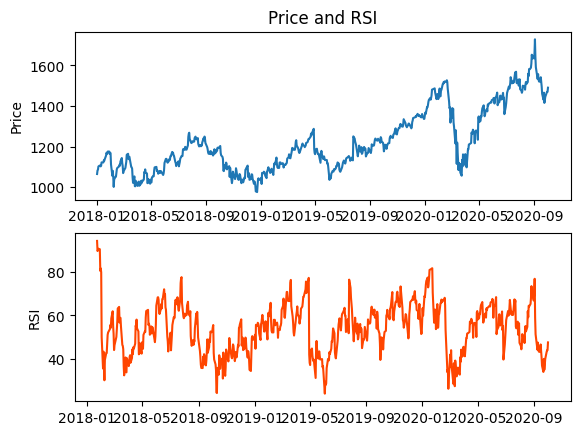

In [24]:
# Calculate RSI
GOOG_daterange['RSI'] = talib.RSI(GOOG_daterange['close'])

# Create subplots
fig, (ax1, ax2) = plt.subplots(2)
# Plot RSI with the price
ax1.set_ylabel('Price')
ax1.plot(GOOG_daterange['close'])
ax2.set_ylabel('RSI')
ax2.plot(GOOG_daterange['RSI'], color='orangered')

ax1.set_title('Price and RSI')
plt.show()

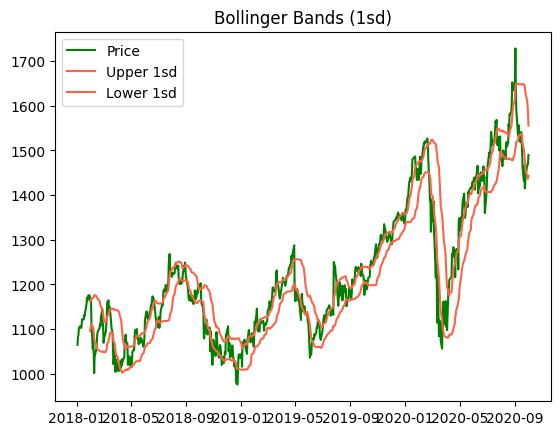

In [25]:
# Define the Bollinger Bands with 1-sd
upper_1sd, mid_1sd, lower_1sd = talib.BBANDS(GOOG_daterange['close'], 
                                     nbdevup = 1,
                                     nbdevdn = 1,
                                     timeperiod=20)
# Plot the upper and lower Bollinger Bands 
plt.plot(GOOG_daterange['close'], color='green', label='Price')
plt.plot(upper_1sd, color='tomato', label="Upper 1sd")
plt.plot(lower_1sd, color='tomato', label='Lower 1sd')

# Customize and show the plot
plt.legend(loc='upper left')
plt.title('Bollinger Bands (1sd)')
plt.show()

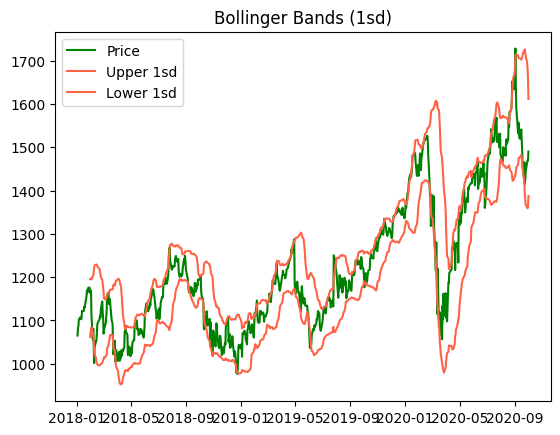

In [26]:
# Define the Bollinger Bands with 2-sd
upper_2sd, mid_2sd, lower_2sd = talib.BBANDS(GOOG_daterange['close'], 
                                     nbdevup = 2,
                                     nbdevdn = 2,
                                     timeperiod=20)
# Plot the upper and lower Bollinger Bands 
plt.plot(GOOG_daterange['close'], color='green', label='Price')
plt.plot(upper_2sd, color='tomato', label="Upper 1sd")
plt.plot(lower_2sd, color='tomato', label='Lower 1sd')

# Customize and show the plot
plt.legend(loc='upper left')
plt.title('Bollinger Bands (1sd)')
plt.show()

C:\Users\Alienware\miniconda3\envs\Py310\lib\site-packages\ffn\core.py:2299: RuntimeWarning:

divide by zero encountered in divide

C:\Users\Alienware\miniconda3\envs\Py310\lib\site-packages\ffn\core.py:2299: RuntimeWarning:

divide by zero encountered in divide



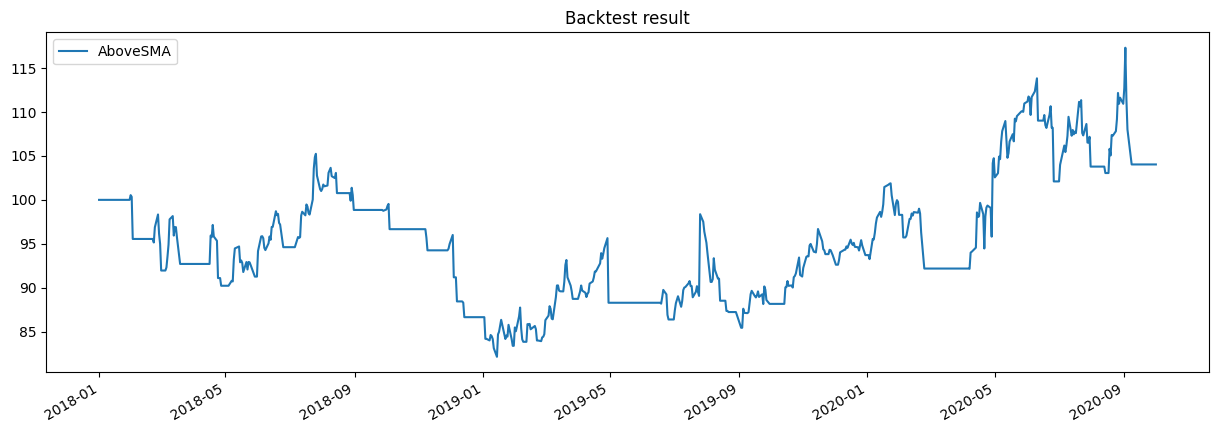

In [27]:
price_data = GOOG_daterange[['close']]

# Calculate the SMA
sma = price_data.rolling(20).mean()

# Define the strategy
bt_strategy = bt.Strategy('AboveSMA', 
                          [bt.algos.SelectWhere(price_data > sma),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])

# Create the backtest and run it
bt_backtest = bt.Backtest(bt_strategy, price_data)
bt_result = bt.run(bt_backtest)
# Plot the backtest result
bt_result.plot(title='Backtest result')
plt.show()

C:\Users\Alienware\miniconda3\envs\Py310\lib\site-packages\ffn\core.py:2299: RuntimeWarning:

divide by zero encountered in divide

C:\Users\Alienware\miniconda3\envs\Py310\lib\site-packages\ffn\core.py:2299: RuntimeWarning:

divide by zero encountered in divide



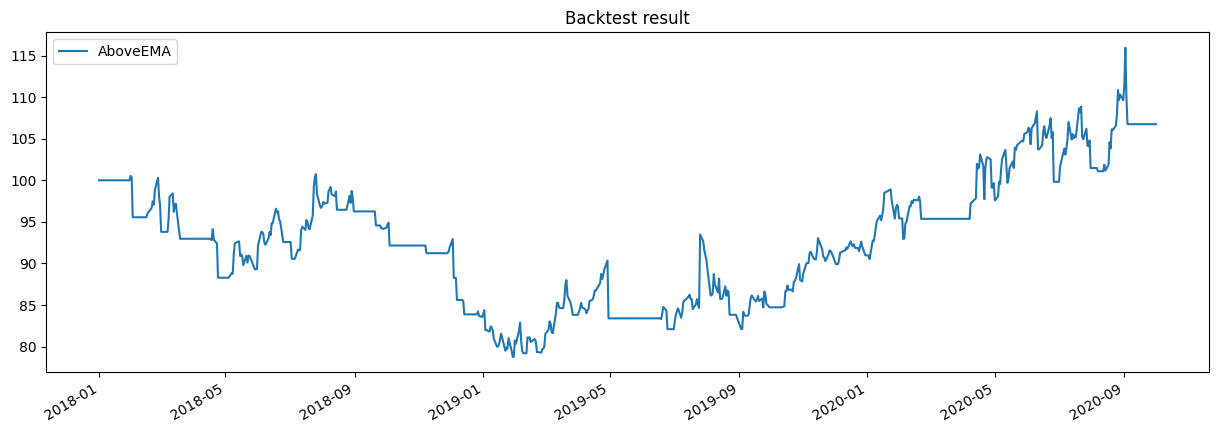

In [28]:
ema = pd.DataFrame()
ema['close'] = talib.EMA(price_data['close'], timeperiod = 20)

# Define the strategy
bt_strategy = bt.Strategy('AboveEMA',
                          [bt.algos.SelectWhere(price_data > ema),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])

# Create the backtest and run it
bt_backtest = bt.Backtest(bt_strategy, price_data)
bt_result = bt.run(bt_backtest)
# Plot the backtest result
bt_result.plot(title='Backtest result')
plt.show()

In [29]:
price_data.shape

(693, 1)

In [30]:
EMA_short = pd.DataFrame()
EMA_long = pd.DataFrame()

EMA_short['Close'] = talib.EMA(price_data['close'], timeperiod = 10)
EMA_long['Close'] = talib.EMA(price_data['close'], timeperiod = 40)

In [31]:
# Construct the signal
signal= EMA_long.copy()
signal[EMA_short > EMA_long] = 1
signal[EMA_short < EMA_long] = -1

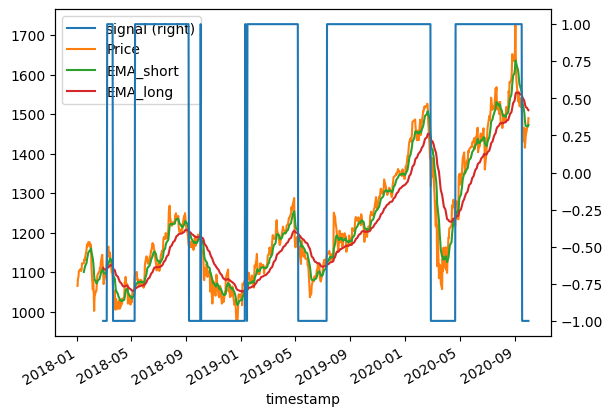

In [32]:
combined_df = bt.merge(signal, price_data, EMA_short, EMA_long)
combined_df.columns = ['signal', 'Price', 'EMA_short', 'EMA_long']
# Plot the signal, price and MAs
combined_df.plot(secondary_y=['signal'])
plt.show()

C:\Users\Alienware\AppData\Local\Temp\ipykernel_25024\3985518828.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Alienware\miniconda3\envs\Py310\lib\site-packages\ffn\core.py:2299: RuntimeWarning:

divide by zero encountered in divide

C:\Users\Alienware\miniconda3\envs\Py310\lib\site-packages\ffn\core.py:2299: RuntimeWarning:

divide by zero encountered in divide



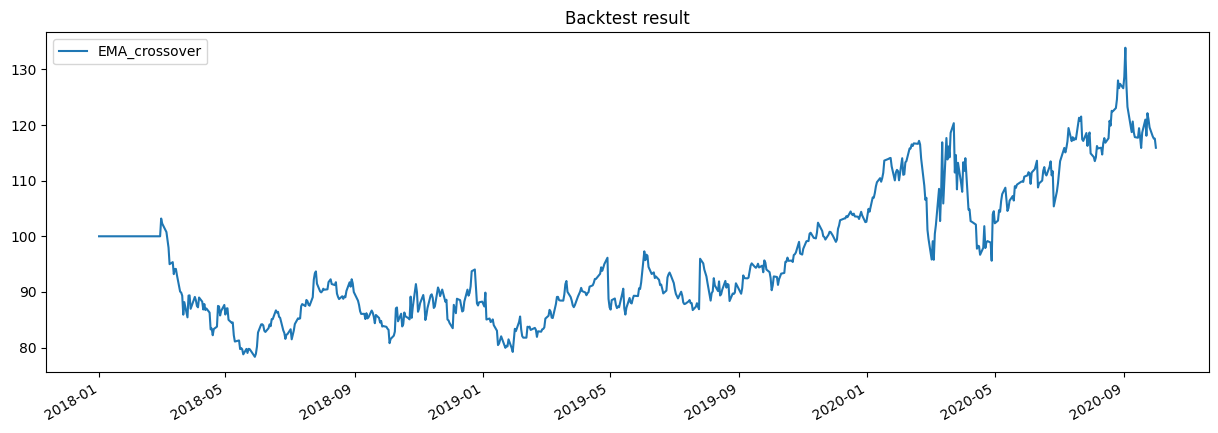

In [33]:
price_data.rename(columns = {'close':'Close'}, inplace = True)

# Define the strategy
bt_strategy = bt.Strategy('EMA_crossover', 
                          [bt.algos.WeighTarget(signal),
                           bt.algos.Rebalance()])

# Create the backtest and run it
bt_backtest = bt.Backtest(bt_strategy, price_data)
bt_result = bt.run(bt_backtest)

# Plot the backtest result
bt_result.plot(title='Backtest result')
plt.show()




In [34]:
stock_rsi = GOOG_daterange['RSI']
# Construct the signal
signal[stock_rsi > 70] = -1
signal[stock_rsi < 30] = 1
signal[(stock_rsi <= 70) & (stock_rsi >= 30)] = 0

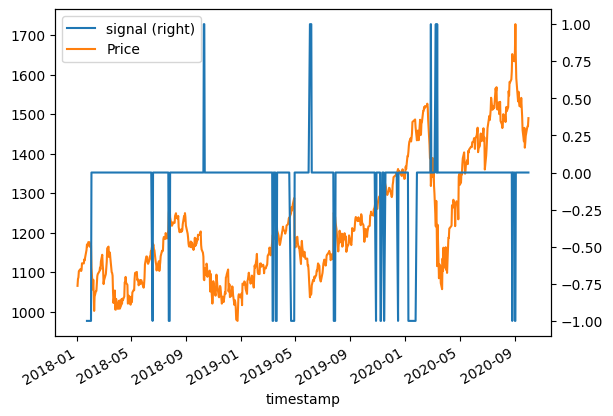

In [35]:
# Merge the data
combined_df = bt.merge(signal, price_data)
combined_df.columns = ['signal', 'Price']
combined_df.plot(secondary_y=['signal'])
plt.show()

In [36]:
# Define the strategy
bt_strategy = bt.Strategy('RSI_MeanReversion', 
                          [bt.algos.WeighTarget(signal),
                           bt.algos.Rebalance()])

C:\Users\Alienware\miniconda3\envs\Py310\lib\site-packages\ffn\core.py:2299: RuntimeWarning:

divide by zero encountered in divide

C:\Users\Alienware\miniconda3\envs\Py310\lib\site-packages\ffn\core.py:2299: RuntimeWarning:

divide by zero encountered in divide



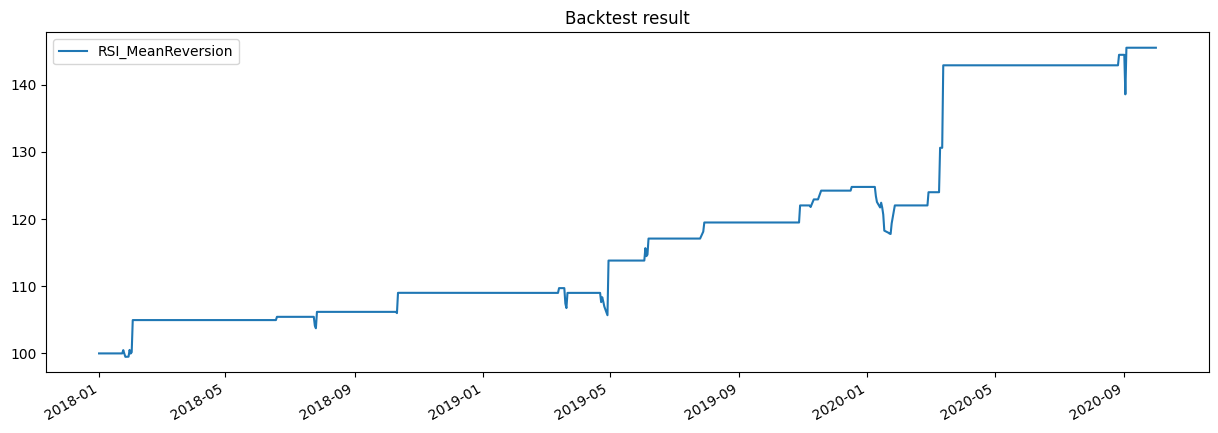

In [37]:
# Create the backtest and run it
bt_backtest = bt.Backtest(bt_strategy, price_data)
bt_result = bt.run(bt_backtest)
# Plot the backtest result
bt_result.plot(title='Backtest result')
plt.show()

In [38]:
def signal_strategy(price_data, period, name):
    # Calculate SMA
    sma = price_data.rolling(period).mean()
    # Define the signal-based Strategy
    bt_strategy = bt.Strategy(name, 
                              [bt.algos.SelectWhere(price_data>sma),
                               bt.algos.WeighEqually(),
                               bt.algos.Rebalance()])
    # Return the backtest
    return bt.Backtest(bt_strategy, price_data)

In [39]:
# Create signal strategy backtest
sma10 = signal_strategy(price_data, period=10, name='SMA10')
sma30 = signal_strategy(price_data, period=30, name='SMA30')
sma50 = signal_strategy(price_data, period=50, name='SMA50')

C:\Users\Alienware\miniconda3\envs\Py310\lib\site-packages\ffn\core.py:2299: RuntimeWarning:

divide by zero encountered in divide

C:\Users\Alienware\miniconda3\envs\Py310\lib\site-packages\ffn\core.py:2299: RuntimeWarning:

divide by zero encountered in divide

C:\Users\Alienware\miniconda3\envs\Py310\lib\site-packages\ffn\core.py:2299: RuntimeWarning:

divide by zero encountered in divide

C:\Users\Alienware\miniconda3\envs\Py310\lib\site-packages\ffn\core.py:2299: RuntimeWarning:

divide by zero encountered in divide



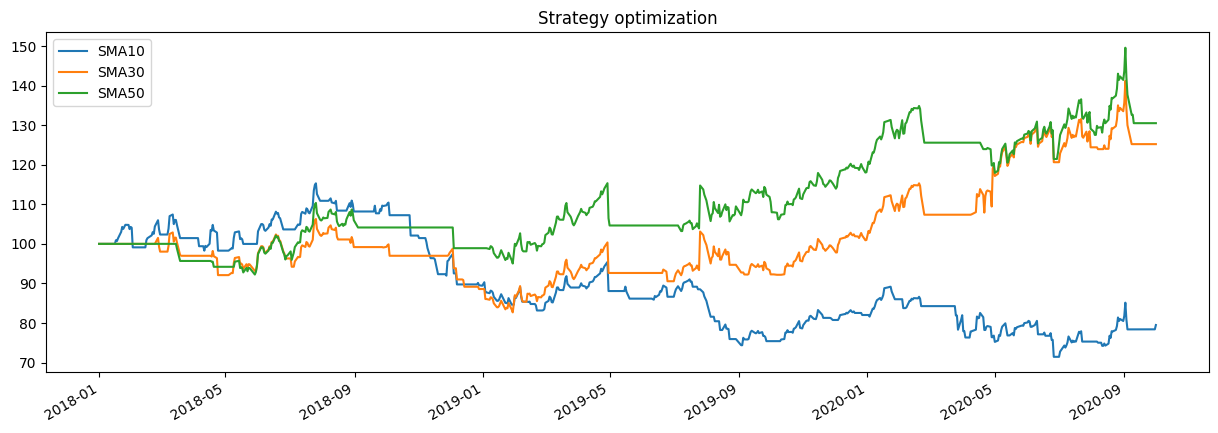

In [40]:
# Run all backtests and plot the resutls
bt_results = bt.run(sma10, sma30, sma50)
bt_results.plot(title='Strategy optimization')
plt.show()

In [41]:
def buy_and_hold(price_data, name):
    # Define the benchmark strategy
    bt_strategy = bt.Strategy(name, 
                              [bt.algos.RunOnce(),
                               bt.algos.SelectAll(),
                               bt.algos.WeighEqually(),
                               bt.algos.Rebalance()])
   # Return the backtest
    return bt.Backtest(bt_strategy, price_data)

In [42]:
# Create benchmark strategy backtest
benchmark = buy_and_hold(price_data, name='benchmark')

C:\Users\Alienware\miniconda3\envs\Py310\lib\site-packages\ffn\core.py:2299: RuntimeWarning:

divide by zero encountered in divide

C:\Users\Alienware\miniconda3\envs\Py310\lib\site-packages\ffn\core.py:2299: RuntimeWarning:

divide by zero encountered in divide

C:\Users\Alienware\miniconda3\envs\Py310\lib\site-packages\ffn\core.py:2299: RuntimeWarning:

divide by zero encountered in divide

C:\Users\Alienware\miniconda3\envs\Py310\lib\site-packages\ffn\core.py:2299: RuntimeWarning:

divide by zero encountered in divide



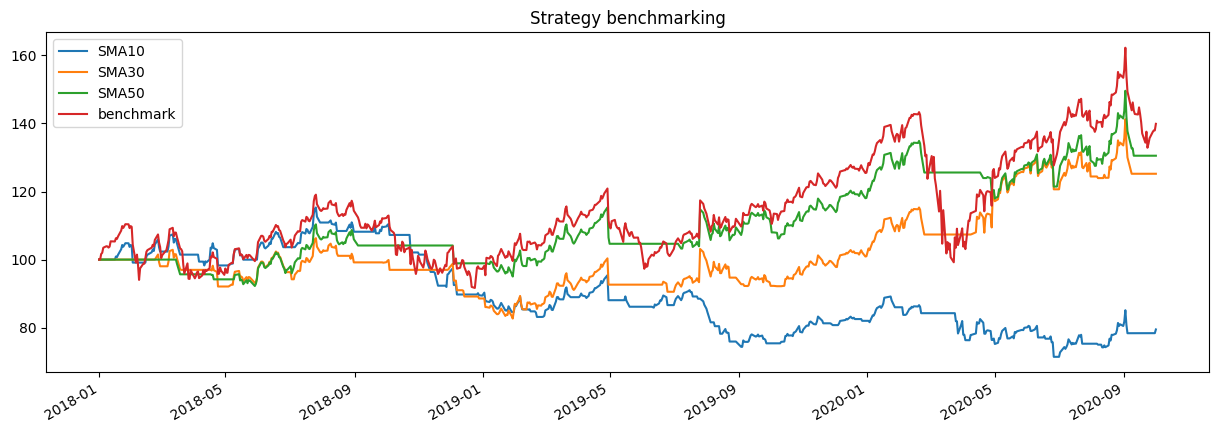

In [43]:
# Run all backtests and plot the resutls
bt_results = bt.run(sma10, sma30, sma50, benchmark)
bt_results.plot(title='Strategy benchmarking')
plt.show()

In [44]:
# Obtain all backtest stats
resInfo = bt_result.stats

# Get daily, monthly, and yearly returns
print('Daily return: %.4f'% resInfo.loc['daily_mean'])
print('Monthly return: %.4f'% resInfo.loc['monthly_mean'])
print('Yearly return: %.4f'% resInfo.loc['yearly_mean'])

# Get the compound annual growth rate
print('Compound annual growth rate: %.4f'% resInfo.loc['cagr'])

Daily return: 0.1417
Monthly return: 0.1417
Yearly return: 0.1553
Compound annual growth rate: 0.1461


C:\Users\Alienware\AppData\Local\Temp\ipykernel_25024\1030489856.py:5: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

C:\Users\Alienware\AppData\Local\Temp\ipykernel_25024\1030489856.py:6: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

C:\Users\Alienware\AppData\Local\Temp\ipykernel_25024\1030489856.py:7: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

C:\Users\Alienware\AppData\Local\Temp\ipykernel_25024\1030489856.py:10: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



In [45]:
resInfo.index

Index(['start', 'end', 'rf', 'total_return', 'cagr', 'max_drawdown', 'calmar',
       'mtd', 'three_month', 'six_month', 'ytd', 'one_year', 'three_year',
       'five_year', 'ten_year', 'incep', 'daily_sharpe', 'daily_sortino',
       'daily_mean', 'daily_vol', 'daily_skew', 'daily_kurt', 'best_day',
       'worst_day', 'monthly_sharpe', 'monthly_sortino', 'monthly_mean',
       'monthly_vol', 'monthly_skew', 'monthly_kurt', 'best_month',
       'worst_month', 'yearly_sharpe', 'yearly_sortino', 'yearly_mean',
       'yearly_vol', 'yearly_skew', 'yearly_kurt', 'best_year', 'worst_year',
       'avg_drawdown', 'avg_drawdown_days', 'avg_up_month', 'avg_down_month',
       'win_year_perc', 'twelve_month_win_perc'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

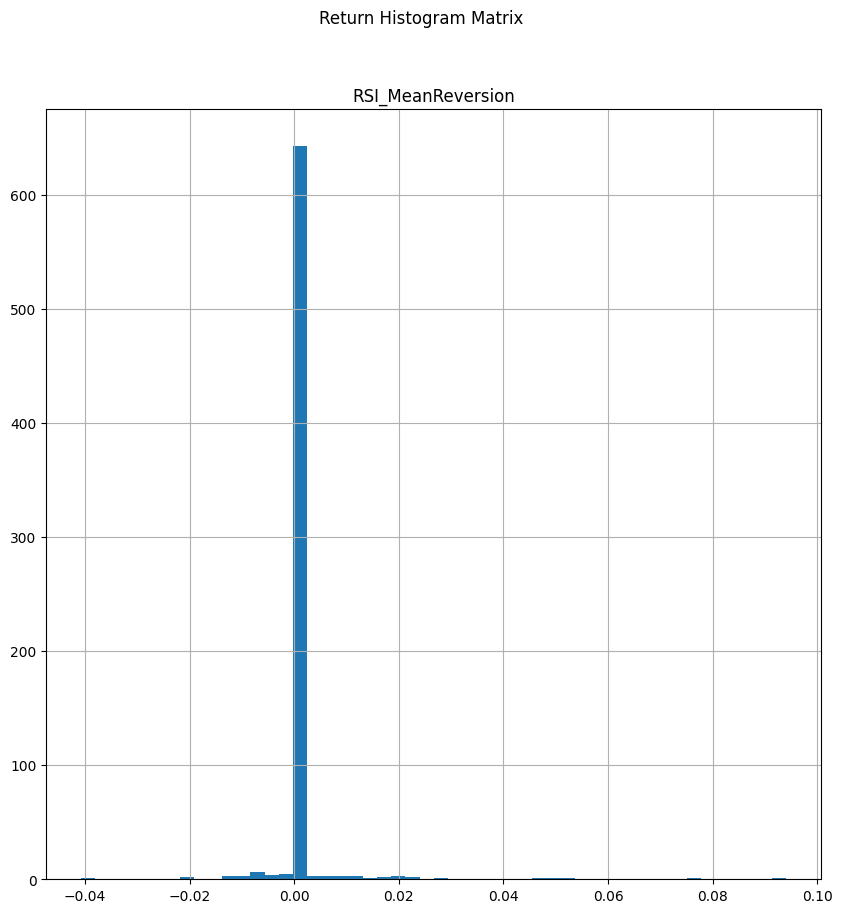

In [46]:
# Plot the daily return histogram
bt_result.plot_histograms(bins=50)
plt.show()

<Figure size 640x480 with 0 Axes>

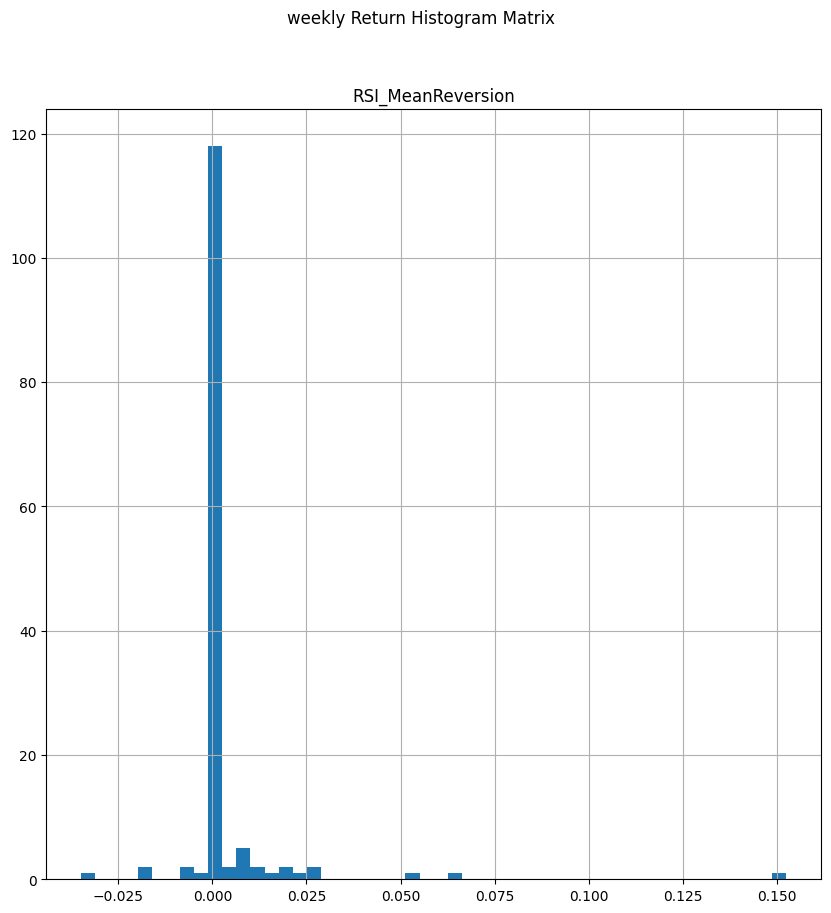

In [47]:
# Plot the weekly return histogram
bt_result.plot_histograms(bins=50, freq='w')
plt.show()

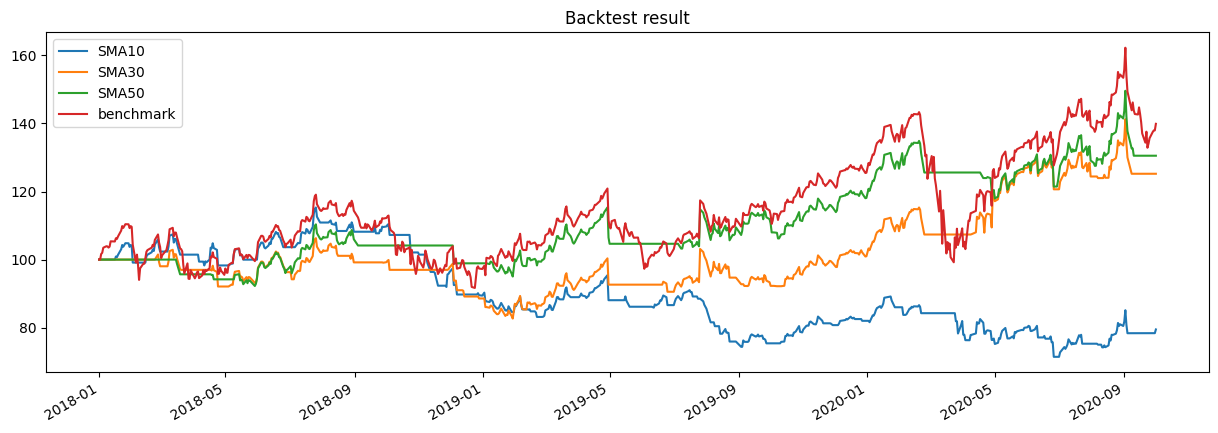

        SMA10   SMA30   SMA50 benchmark
mtd     1.39%   0.00%   0.00%     1.39%
3m     11.25%   3.79%   4.24%     3.62%
6m      1.99%  16.61%   3.93%    34.74%
ytd    -3.09%  23.99%  10.50%    11.44%
1y      5.40%  35.67%  18.00%    23.63%
3y     -8.01%   8.52%  10.17%    12.98%
5y       nan%    nan%    nan%      nan%
10y      nan%    nan%    nan%      nan%
incep  -8.01%   8.52%  10.17%    12.98%


In [48]:
# Plot the backtest result
bt_results.plot(title='Backtest result')
plt.show()

# Get the lookback returns
lookback_returns = bt_results.display_lookback_returns()
print(lookback_returns)

In [49]:
# Obtain all backtest stats
resInfo = bt_result.stats

# Get the average drawdown
avg_drawdown = resInfo.loc['avg_drawdown']
print('Average drawdown: %.2f'% avg_drawdown)

# Get the average drawdown days
avg_drawdown_days = resInfo.loc['avg_drawdown_days']
print('Average drawdown days: %.0f'% avg_drawdown_days)

Average drawdown: -0.02
Average drawdown days: 12


C:\Users\Alienware\AppData\Local\Temp\ipykernel_25024\1999434887.py:6: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

C:\Users\Alienware\AppData\Local\Temp\ipykernel_25024\1999434887.py:10: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



In [50]:
# Get the CAGR
cagr = resInfo.loc['cagr']
print('Compound annual growth rate: %.4f'% cagr)

# Get the max drawdown
max_drawdown = resInfo.loc['max_drawdown']
print('Maximum drawdown: %.2f'% max_drawdown)

# Calculate Calmar ratio manually
calmar_calc = cagr / max_drawdown * (-1)
print('Calmar Ratio calculated: %.2f'% calmar_calc)

# Get the Calmar ratio
calmar = resInfo.loc['calmar']
print('Calmar Ratio: %.2f'% calmar)

Compound annual growth rate: 0.1461
Maximum drawdown: -0.06
Calmar Ratio calculated: 2.60
Calmar Ratio: 2.60


C:\Users\Alienware\AppData\Local\Temp\ipykernel_25024\1225434969.py:3: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

C:\Users\Alienware\AppData\Local\Temp\ipykernel_25024\1225434969.py:7: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

C:\Users\Alienware\AppData\Local\Temp\ipykernel_25024\1225434969.py:11: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

C:\Users\Alienware\AppData\Local\Temp\ipykernel_25024\1225434969.py:15: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



In [51]:
# Get annual return and volatility
yearly_return = resInfo.loc['yearly_mean']
print('Annual return: %.2f'% yearly_return)
yearly_vol = resInfo.loc['yearly_vol']
print('Annual volatility: %.2f'% yearly_vol)

# Calculate the Sharpe ratio manually
sharpe_ratio = yearly_return / yearly_vol
print('Sharpe ratio calculated: %.2f'% sharpe_ratio)

# Print the Sharpe ratio
print('Sharpe ratio %.2f'% resInfo.loc['yearly_sharpe'])

Annual return: 0.16
Annual volatility: 0.02
Sharpe ratio calculated: 10.24
Sharpe ratio 10.24


C:\Users\Alienware\AppData\Local\Temp\ipykernel_25024\3803746343.py:3: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

C:\Users\Alienware\AppData\Local\Temp\ipykernel_25024\3803746343.py:5: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

C:\Users\Alienware\AppData\Local\Temp\ipykernel_25024\3803746343.py:9: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

C:\Users\Alienware\AppData\Local\Temp\ipykernel_25024\3803746343.py:12: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



In [52]:
# Print annual Sortino ratio
yearly_sortino = resInfo.loc['yearly_sortino']
print('Annual Sortino ratio: %.2f'% yearly_sortino)

# Print monthly Sortino ratio
monthly_sortino = resInfo.loc['monthly_sortino']
print('Monthly Sortino ratio %.2f'% monthly_sortino)

Annual Sortino ratio: inf
Monthly Sortino ratio 10.65


C:\Users\Alienware\AppData\Local\Temp\ipykernel_25024\1764253032.py:3: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

C:\Users\Alienware\AppData\Local\Temp\ipykernel_25024\1764253032.py:7: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

